In [1]:

import numpy as np # linear algebra
import pandas as pd 

import os

## Importing our libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split


In [3]:
from tensorflow.keras.applications.mobilenet import MobileNet



In [4]:
import keras
from keras import Sequential

from keras.layers import Dense
from keras.preprocessing import image

In [5]:
df = pd.read_csv('../input/brain-tumor/Brain Tumor.csv',usecols=[0,1])
df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


## Get a closer insights about our dataset

### Check if there is any null value or not 

In [6]:
df.isna().sum()

Image    0
Class    0
dtype: int64

### Check imbalance or not
##### we could deal with it later on by performing data augmentation

In [7]:
df['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

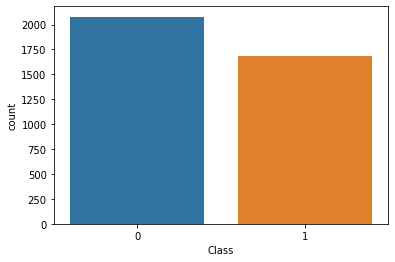

In [8]:
#plot the value count
sns.countplot(df['Class'])

## Get our data ready!!

In [9]:
path_list = []
base_path = '../input/brain-tumor/Brain Tumor/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))

In [10]:
#create path dictonary and then map itto brain_df['pathes']
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
df['pathes'] = df['Image'].map(pathes_dict.get)

In [11]:
df.head()

,Image,Class,pathes
0,Image1,0,../input/brain-tumor/Brain Tumor/Brain Tumor/I...
1,Image2,0,../input/brain-tumor/Brain Tumor/Brain Tumor/I...
2,Image3,1,../input/brain-tumor/Brain Tumor/Brain Tumor/I...
3,Image4,1,../input/brain-tumor/Brain Tumor/Brain Tumor/I...
4,Image5,0,../input/brain-tumor/Brain Tumor/Brain Tumor/I...


## plotting some samples from the dataset

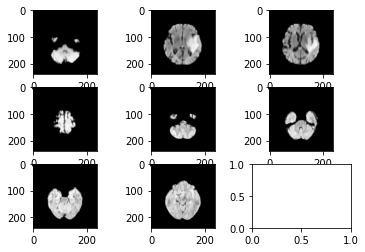

In [12]:

for x in range (0 ,9):
    img = imread(df['pathes'][x])
    plt.imshow(img)
    plt.subplot(3,3,x+1)

In [13]:
from PIL.Image import open
df['pixels']=df['pathes'].map(lambda x:np.asarray(open(x).resize((224,224))))


In [14]:
df.head()

,Image,Class,pathes,pixels
0,Image1,0,../input/brain-tumor/Brain Tumor/Brain Tumor/I...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,../input/brain-tumor/Brain Tumor/Brain Tumor/I...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,../input/brain-tumor/Brain Tumor/Brain Tumor/I...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,../input/brain-tumor/Brain Tumor/Brain Tumor/I...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,../input/brain-tumor/Brain Tumor/Brain Tumor/I...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


## preprocessing our dataset before using MobileNet

In [15]:
image_list = []
for i in range(0,len(df)):
    # load image
    brain_img = df['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(brain_img)
     # append to list of all images
    image_list.append(keras.applications.mobilenet_v2.preprocess_input(img_array))
    
# convert image list to single array
# Our feature
X = np.array(image_list)

# print shape of X
print(X.shape)

(3762, 224, 224, 3)


In [16]:
# get the class label as np.array
y = np.array(df.Class)

In [17]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Splitting the dataset to training set(80%) and testing set (20%)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)


print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


## Build model(MobileNet)

In [19]:
 from keras.applications.mobilenet_v2 import MobileNetV2

In [20]:
num_classes = 1
model = Sequential()
model.add(MobileNetV2(input_shape=(224, 224, 3),weights="imagenet"
                             ,include_top=False))
model.add(keras.layers.GlobalAveragePooling2D())
model.add( Dense(num_classes, activation='sigmoid',name='preds'))
model.layers[0].trainable= False
# show model summary
model.summary()


2022-03-19 10:53:05.372124: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
preds (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
pip install tensorflow


     |████████████████████████████████| 14.8 MB 803 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77055 sha256=fe3169c4f6351e81716f7f26d8a412478eaee0a911fabbfcbf3db7a02afdbef9
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.

In [22]:
import tensorflow

In [23]:
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=tensorflow.keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)


# mock-train the model 
model.fit(
    X_train[:,:,:,:],
    y_train[:],
    epochs=10,
    verbose=1,
    validation_data=(X_test[:,:,:,:], y_test[:])
)
model.save("model_brain.h5")
print("Saved model to disk")

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-03-19 10:53:42.581249: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
95/95 [==============================] - 43s 414ms/step - loss: 0.5727 - accuracy: 0.7195 - val_loss: 0.5564 - val_accuracy: 0.7158
Epoch 2/10
95/95 [==============================] - 38s 396ms/step - loss: 0.4959 - accuracy: 0.7886 - val_loss: 0.4988 - val_accuracy: 0.7795
Epoch 3/10
95/95 [==============================] - 37s 387ms/step - loss: 0.4543 - accuracy: 0.8112 - val_loss: 0.4717 - val_accuracy: 0.7769
Epoch 4/10
95/95 [==============================] - 37s 389ms/step - loss: 0.4273 - accuracy: 0.8212 - val_loss: 0.4428 - val_accuracy: 0.8008
Epoch 5/10
95/95 [==============================] - 37s 389ms/step - loss: 0.4086 - accuracy: 0.8318 - val_loss: 0.4311 - val_accuracy: 0.8141
Epoch 6/10
95/95 [==============================] - 37s 386ms/step - loss: 0.3935 - accuracy: 0.8382 - val_loss: 0.4185 - val_accuracy: 0.8114
Epoch 7/10
95/95 [==============================] - 37s 386ms/step - loss: 0.3821 - accuracy: 0.8465 - val_loss: 0.4182 - val_accuracy: 0.8220

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved model to disk


In [24]:
pretrained_cnn = keras.models.load_model('./model_brain.h5')

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(X_test,y_test)
# print loss score
print('Eval loss:',eval_score[0])
# print accuracy score
print('Eval accuracy:',eval_score[1] )

24/24 [==============================] - 11s 422ms/step - loss: 0.3865 - accuracy: 0.8367
Eval loss: 0.38648414611816406
Eval accuracy: 0.8366534113883972


In [25]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)

{'No Tumor': {'precision': 0.8183908045977012,
  'recall': 0.89,
  'f1-score': 0.8526946107784432,
  'support': 400},
 'Tumor': {'precision': 0.8616352201257862,
  'recall': 0.7762039660056658,
  'f1-score': 0.8166915052160953,
  'support': 353},
 'accuracy': 0.8366533864541833,
 'macro avg': {'precision': 0.8400130123617437,
  'recall': 0.8331019830028329,
  'f1-score': 0.8346930579972693,
  'support': 753},
 'weighted avg': {'precision': 0.8386634190484502,
  'recall': 0.8366533864541833,
  'f1-score': 0.8358166608933054,
  'support': 753}}

### There is only 81 images out of 753 testing images are misclassified 

In [27]:
confusion_matrix(y_test , y_pred ) 

array([[356,  44],
       [ 79, 274]])